# Ομάδα Α25
### Νίκος Τσιλιβής, ΑΜ: 03114078
### Φοίβος Καλογιάννης, ΑΜ: 03114831

# Άσκηση 3: Βελτιστοποίηση συναρτήσεων με Γενετικούς Αλγόριθμους
v1.0, 08/01/2019

<img src="http://infinity77.net/global_optimization/_images/Alpine01.png" alt="Alpine01" style="width: 500px;"/>

Στόχος της άσκησης είναι η βελτιστοποίηση συναρτήσεων χωρίς παραγώγους (derivative free optimization) με χρήση Γενετικών Αλγόριθμων μέσω της βιβλιοθήκης DEAP. Η βελτιστοποίηση χωρίς παραγώγους είναι ιδιαίτερα χρήσιμη σε περιπτώσεις όπου η αντικειμενική συνάρτηση $f$ δεν είναι διαθέσιμη (black-box optimization) ή σε περίπτωσεις που είναι, είναι δύσκολο ή μη πρακτικό να υπολογιστούν οι παράγωγοί της. Για παράδειγμα η  $f$ μπορεί να μην είναι διαφορίσιμη, η παραγώγιση της μπορεί να είναι δύσκολη ή να απαιτεί πολύ χρόνο,  η $f$ να περιέχει θόρυβο έτσι ώστε οι μέθοδοι που βασίζονται σε απειροστικές διαφορές να μην είναι αποτελεσματικές ή να υπάρχουν πολλά τοπικά ελάχιστα μεταξύ άλλων. 

Για περισσότερα πάνω στη βελτιστοποίηση χωρίς παραγώγους και τις εφαρμογές της, μπορείτε να συμβουλευτείτε το ["Gradient Free Optimization"](http://adl.stanford.edu/aa222/lecture_notes_files/chapter6_gradfree.pdf). 

Οφείλουμε εδώ να αναφέρουμε ότι κάποιες από τις συναρτήσεις που θα μελετήσουμε με ΓΑ μπορούν να βελτιστοποιηθούν πολύ ικανοποιητικά, ειδικά σε μικρές διαστάσεις, και με κλασικές αριθμητικές μεθόδους.

In [1]:
! pip install deap

    100% |████████████████████████████████| 942kB 17.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
Successfully built deap


## Συναρτήσεις προς βελτιστοποίηση

Σε κάθε ομάδα αντιστοιχεί μία μη-κλιμακούμενη συνάρτηση (non-scalable, δηλαδή ορίζεται για συγκεκριμένες διαστάσεις του πεδίου ορισμού) και μία κλιμακούμενη (scalable, μπορεί να οριστεί για οποιαδήποτε διάσταση D). 

Καμία ομάδα δεν έχει τις ίδιες συναρτήσεις συνολικά με κάποια άλλη.

 Στο [“Ομάδες - Συναρτήσεις”](https://docs.google.com/spreadsheets/d/1g9otvvm1GIALF5c3Fsf45tULdoDZAmXnjmXyuW4sbro/edit?usp=sharing) θα βρείτε έναν αριθμό για τη μη-κλιμακούμενη συνάρτηση και έναν αριθμό για την κλιμακούμενη συνάρτηση που αντιστοιχούν στην ομάδα σας.
 
Θα βρείτε σε ποια συνάρτηση αντιστοιχεί ο κάθε αριθμός στο paper [“Α Literature Survey of Benchmark Functions For Global Optimization Problems”](https://goo.gl/qAhxNf), στο Section 3 (σελ. 5 και εξής). 

**Προσοχή:** ορισμένες συναρτήσεις όπως αναγράφονται στο paper έχουν μικρά (εώς μεσαία) λάθη ή χρειάζονται κάποια επεξήγηση. Έχουμε συγκεντρώσει τα errata που έχουμε ανακαλύψει μέχρι τώρα στο έγγραφο ["Errata στους ορισμούς συναρτήσεων"](https://drive.google.com/open?id=1MrRpq8q_hDfBZVw1CHBzC7t4biQkAftu3LEWXJMf6s0), παρακαλούμε συμβουλευτείτε το **απαραίτητα** για να δείτε αν αφορά σε κάποια από τις συναρτήσεις σας.

Οι ομάδες που έχουν μη-κλιμακούμενες συναρτήσεις με κωδικούς Α01-Α10 ή κλιμακούμενες συναρτήσεις με κωδικούς B01-B10 θα βρουν τους ορισμούς που τους αντιστοιχούν στο συμπληρωματικό έγγραφο ["Πρόσθετοι ορισμοί συναρτήσεων"](https://docs.google.com/document/d/1F-YJ5Ripo0N5ZAXCS52eGqNVB9RF6ZTvjnOh5ICHfss/edit?usp=sharing).

Όλες οι συναρτήσεις είναι προς **ελαχιστοποίηση**.


## Επιλογή κατάλληλου Γενετικού Αλγόριθμου

Ο κάθε Γενετικός Αλγόριθμος χαρακτηρίζεται α) από τους γενετικούς τελεστές του δηλαδή τον ορισμό της διασταύρωσης, μετάλλαξης και επιλογής και β) από τη στρατηγική εξέλιξης που καθορίζει την εξέλιξη του πληθυσμού μέσω της διαδικασίας επιλογής, καθώς και των  πιθανοτήτων διασταύρωσης και μετάλλαξης.

Όπως πολύ συχνά ισχύει σε προβλήματα Μηχανικής Μάθησης, η επιλογή του κατάλληλου αλγόριθμου εξαρτάται από το κάθε πρόβλημα και τα δεδομένα του. Συνεπώς για κάθε συνάρτηση θα πρέπει να δοκιμαστούν διαφορετικοί συνδυασμοί τελεστών και στρατηγικών.

**Θα χρησιμοποιήσουμε ως γονίδια πραγματικούς αριθμούς και ως χρωμοσώματα λίστες γονιδίων μήκους ίσο με τη διάσταση του πεδίου ορισμού της συνάρτησης.**



### Αξιολόγηση Γενετικών Αλγόριθμων

Μπορούμε να πούμε ότι ένας ΓΑ είναι πιθανόν να έχει καλύτερα χαρακτηριστικά για ένα δεδομένο πρόβλημα αν:
- βρίσκει τη λύση (βέλτιστη τιμή) με μεγαλύτερη συχνότητα
- βρίσκει τη βέλτιστη λύση με μικρότερο αριθμό αποτιμήσεων της συνάρτησης καταλληλότητας




#### Απόλυτα κριτήρια
Πρακτικά, για να αξιολογήσουμε τους αλγόριθμους της άσκησης θα φτιάξουμε μια συνάρτηση που θα αναλύει τα logbooks του αλγόριθμου ως εξής:  

Για ένα μέγιστο αριθμό γύρων (MAX_ROUNDS)  
&nbsp;&nbsp;&nbsp;&nbsp;Για ένα μέγιστο αριθμό γενεών (MAX_GENS)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Για κάθε ΓΑ με δεδομένους γενετικούς τελεστές και στρατηγική εξέλιξης υπολογίζουμε τα εξής μεγέθη:

 
- **avg.min:** ο μέσος όρος της ελάχιστης τιμής που πέτυχε για όλους τους γύρους. Επί της ουσίας αυτό είναι το πιο σημαντικό και απόλυτο κριτήριο της επίδοσης του αλγόριθμου.
- **avg.evals:** o μέσος όρος των συνολικών αποτιμήσεων (άθροιση όλων των γενεών) που έκανε για όλους τους γύρους.
- **avg.time:** ο μέσος χρόνος εκτέλεσης των γύρων. 



#### Σχετικά κριτήρια

Τα προηγούμενα κριτήρια αποτελούν τα απόλυτα μέτρα της επίδοσης του αλγόριθμου.  Ωστόσο, επειδή δεν είναι εφικτό για κάθε συνάρτηση να αναμένουμε ότι σε λογικά χρονικά διαστήματα (ή και γενικά) θα βρούμε την ακριβή βέλτιστη λύση, ορίζουμε ως επιτυχία την ποσότητα **GOAL + DELTA**, όπου GOAL το ελάχιστο της συνάρτησης (δίνεται στο pdf ή στον ορισμό της συναρτησής σας) και DELTA μια θετική ποσότητα που θα ορίζουμε εμείς κάθε φορά (διαφορετική για κάθε συνάρτηση και διαφορετική ανάλογα του πόσο κοντά στη λύση θέλουμε να φτάσουμε). Με βάση την ποσότητα GOAL + DELTA ορίζουμε επιπλέον τα εξής μεγέθη:
- **successes:** αριθμός φορών που o ΓΑ βρήκε τιμή μικρότερη του GOAL + DELTA. Προφανώς το βέλτιστο είναι MAX_ROUNDS.
- **success avg. gen:** o μέσος όρος των γενεών που χρειάστηκε ο αλγόριθμος για να πέσει κάτω από GOAL + DELTA, για τους γύρους με επιτυχία. Ουσιαστικά μας ενδιαφέρει η πρώτη γενιά που πετυχαίνει τιμή κάτω από GOAL + DELTA. Σε περίπτωση που δεν πετυχαίνει αυτό το στόχο καμία γενιά, θέτουμε ‘None’ σε αυτή την ποσότητα.
- **success avg. min:** ο μέσος όρος των ελαχίστων των πρώτων επιτυχημένων γενεών για τους γύρους με επιτυχία. Παρόμοια, θέτουμε ‘None’ σε περίπτωση αποτυχίας.
- **success avg. evals:** ο μέσος όρος αποτιμήσεων που χρειάστηκαν για να πάρουμε την πρώτη τιμή κάτω από GOAL + DELTA. Και πάλι  θέτουμε ‘None’ σε περίπτωση αποτυχίας.

Πρόκειται ουσιαστικά για ένα σύνολο πιο "χαλαρών" κριτηρίων βελτιστοποίησης (λόγω του DELTA) που όμως θα μας βοηθήσουν να προσδιορίσουμε ευκολότερα τις υπερπαραμέτρους του τελικού γενετικού αλγόριθμου.




## Μέρος 1. Βελτιστοποίηση μη κλιμακούμενης συνάρτησης


0.0


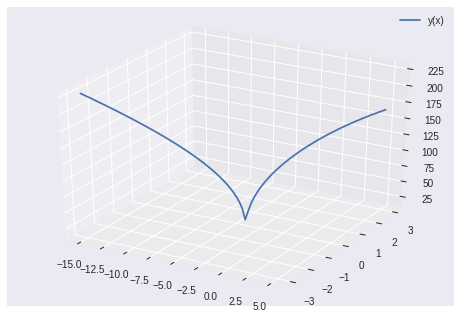

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#mpl.rcParams['legends.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

def y(x1, x2): return 100*(abs(x2-0.01*(x1**2)))**(.5) + 0.01*abs(x1+10) # Bukin 6 function

print(y(-10, 1))
# plot model function
x1 = np.linspace(-15, 5, 101)
x2 = np.linspace(-3, 3, 101)
ax.plot(x1, x2, y(x1, x2), zdir='z', label='y(x)')
ax.legend()

plt.show()


### Εύρεση βέλτιστου συνδυασμού τελεστών - στρατηγικής


### Εύρεση βέλτιστου συνδυασμού
Από τις αρχικές δοκιμές που κάναμε για τη συνάρτηση μας, φάνηκε να εντοπίζει αρκετά συχνά την ελάχιστη τιμή 0, αλλά σε αρκετές περιπτώσεις "κόλλαγε" σε μία τιμή γύρω στο 10, ενώ άλλες φορές σε μία τιμή ανάμεσα στο 0 και στο 10. Χοντρικά, λοιπόν, (και λαμβάνοντας υπόψιν τη συμβουλή της εκφώνησης για τα ποσοστά στους καλύτερους και τους χειρότερους συνδυσμούς) ορίζουμε $DELTA = 5$. Ο πληθυσμός διατηρείται στους 100 (εξ΄άλλου με διάφορες δοκιμές που κάναμε και αργότερα για το βέλτιστο συνδυασμό, δεν φάνηκαν ποτέ οι αλγόριθμοι μας να ευνοούνται ιδιαίτερα από την αύξηση των πληθυσμών), οι γενιές στις 50 και τρέχουμε τους 32 συνδυασμούς 5 φορές τον καθένα. Οι τιμές διασταύρωσης και μετάλλαξης διατηρούνται σε βασικά επίπεδα με τιμές 0.5 και 0.2 αντίστοιχα. Αναφορικά με τους τελεστές:
* Ως τελεστές διασταύρωσης επιλέγουμε να εξετάσουμε τον Blend (κυρτός συνδυασμός των χρωμοσωμάτων των 2 ατόμων, γύρω από ένα διάστημα επιλογής) και τον SimulatedBinary. Αξίσει να σημειώσουμε πως στον 2ο τελεστή μεγάλη τιμή της παραμέτρου (eta) σημαίνει μικρότερη αλλαγή γενετικού υλικού, μιας και η παράμετρος αυτή υπεισέρχεται στον παρονομαστή μιας δύναμης στην οποία υψώνεται αριθμός με τον οποίο πολλαπλασιάζεται η γενετική πληροφορία (για σαφέστερη επεξήγηση ανατρέξτε στο [documentation](https://github.com/DEAP/deap/blob/master/deap/tools/crossover.py) της συνάρτησης).
* Για την μετάλλαξη, επιλέγουμε αρχικά την Gaussian κεντραρισμένη στο μέσο του πεδίου ορισμου της αντίστοιχης μεταβλητής, καθώς και την Shuffle Index, η οποία με μία ανεξάρτητη πιθανότητα ανακατεύει κάποιο γονίδιο με κάποιο άλλο. Κίνητρο για την επιλογή αυτή είναι η μερική επικάλυψη των πεδιών ορισμών των ανεξάρτητων μεταβλητών, με αποτέλεσμα να είναι πιθανή η δημιουργία καλού απογόνου μετά από μετάλλαξη.

In [108]:
from deap import base, creator, tools
import time, bisect

def f(ind):
  sum = 100*(abs(ind[1]-0.01*(ind[0]**2)))**(.5) + 0.01*abs(ind[0]+10)
  return (sum,) # Bukin 6 function

# penaltise

def feasible(ind):
    if ind[0] < -15 or ind[0] > 5 or ind[1] < -3 or ind[1] > 3:
        return False
    return True

def distance(ind) :
    dist = 0.0
    if ind[0] < -15: 
      dist += -15 - ind[0]
    elif ind [0] > 5:
      dist += ind[0] - 5
    if ind[1] < -3:
      dist += -3 - ind[1]
    elif ind[1] > 3:
      dist += ind[1] -3
    
    return dist  

creator.create("FitnessMin", base.Fitness , weights=(-1.0,))
creator.create("IndividualContainer", list , fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("Initial_x1", np.random.uniform, -15, 5)
toolbox.register("Initial_x2", np.random.uniform, -3, 3)
toolbox.register("indiv", tools.initCycle, creator.IndividualContainer, (toolbox.Initial_x1, toolbox.Initial_x2), 1)
toolbox.register("population", tools.initRepeat, list , toolbox.indiv)

epochs = 50 # number of generations
DELTA = 5.0 # approximation factor
max_rounds = 5 # number of rounds

## first value in all tuples is for distinction between the different ops (except of select)

# Crossover operators args
cross_ops = [(1, 1.0), (2, 4.0), (3, 8), (4, 2)] # low for Simulated Binary crossover means big change in genetic material
# Naming dictionary
cross_dict = {
    1: "Blendlow",
    2: "Blendhigh",
    3: "SimulatedBinarylow",
    4: "SimulatedBinaryhigh"
}

# Mutation operators args
mut_ops = [(1, [-5.0, 0.0], [3.0, 1.0], 0.05), (2, [-5.0, 0.0], [7.0, 2.0], 0.25), (3, 0.05), (4, 0.1)]
# Naming dictionary
mut_dict = {
    1: "MutGaussianlow",
    2: "MutGaussianhigh",
    3: "ShuffleIndexeslow",
    4: "ShuffleIndexeshigh"
}

# Selection operators args
sel_ops = [3, 10]
# Naming dictionary
sel_dict = {
    3: "Seltournamentlow",
    10: "Seltournamenthigh"
}

# Evolving strategies args
strategies = [(1, 0.5, 0.2), (2, 25, 75, 0.5, 0.2), (3, 25, 100, 0.5, 0.2)] 
# Naming dictionary
ev_dict = {
    1: "eaSimple 100 0.5 0.2",
    2: "eaMuPlusLambda 25 75 0.5 0.2",
    3: "eaMuCommaLambda 25 100 0.5 0.2"
}

toolbox.register("evaluate", f)
toolbox.decorate("evaluate", tools.DeltaPenality (feasible, 10, distance))

algo_dict={} # for algorithm comparison
for n_round in range(max_rounds):
  for mate in cross_ops:
    for mutate in mut_ops:
      for select in sel_ops:
        for evolve in strategies:
          
          if (mate[0] == 1 or mate[0] == 2):
            toolbox.register("mate", tools.cxBlend, alpha=mate[1])
          else:
            toolbox.register("mate", tools.cxSimulatedBinary, eta=mate[1])
          
          if (mutate[0] == 1 or mutate[0] == 2):
            toolbox.register("mutate", tools.mutGaussian, mu=mutate[1], sigma=mutate[2], indpb=mutate[3])
          else:
            toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mutate[1])
          
          toolbox.register("select", tools.selTournament, tournsize=select)
          
    
          pop = toolbox.population(n=100)
          hof = tools.HallOfFame(1)
          stats = tools.Statistics(lambda ind: ind.fitness.values)
          stats.register("avg", np.mean)
          stats.register("min", np.min)
          stats.register("max", np.max)

          start = time.time()
          
          print(cross_dict[mate[0]] + ',' + mut_dict[mutate[0]] + ',' + sel_dict[select], ev_dict[evolve[0]])
          if (evolve[0] == 1):
            pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=evolve[1], mutpb=evolve[2], ngen=epochs, stats=stats, halloffame=hof, verbose=True)
          elif (evolve[0] == 2):
            pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=evolve[1], lambda_=evolve[2], ngen=epochs, cxpb=evolve[3], mutpb=evolve[4], stats=stats, halloffame=hof, verbose=True)
          else:
            pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=evolve[1], lambda_=evolve[2], ngen=epochs, cxpb=evolve[3], mutpb=evolve[4], stats=stats, halloffame=hof, verbose=True)
          
          end = time.time()
          
          nevals, avg, min_ = logbook.select("nevals", "avg", "min")
          index = len(min_)-bisect.bisect_left(min_[::-1], DELTA)+1 # first generation that its min is under DELTA + 0.0
          if (n_round == 0):
            algo_dict[mate[0], mutate[0], select, evolve[0]] = [min_[-1], sum(nevals), end-start, int(min_[-1] <= DELTA), index if index <= len(min_) else "None", min_[index-1] if index <= len(min_) else "None", sum(nevals[0:index]) if index <= len(min_) else "None"]
          else:
            algo_dict[mate[0], mutate[0], select, evolve[0]][0] += min_[-1]
            algo_dict[mate[0], mutate[0], select, evolve[0]][1] += sum(nevals)
            algo_dict[mate[0], mutate[0], select, evolve[0]][2] += end-start
            algo_dict[mate[0], mutate[0], select, evolve[0]][3] += int(min_[-1] <= DELTA)
            if algo_dict[mate[0], mutate[0], select, evolve[0]][4] != "None" and index <= len(min_):
              algo_dict[mate[0], mutate[0], select, evolve[0]][4] += index
            if algo_dict[mate[0], mutate[0], select, evolve[0]][5] != "None" and index <= len(min_):
              algo_dict[mate[0], mutate[0], select, evolve[0]][5] += min_[index-1]
            if algo_dict[mate[0], mutate[0], select, evolve[0]][6] != "None" and index <= len(min_):
              algo_dict[mate[0], mutate[0], select, evolve[0]][6] += sum(nevals[0:index])
            

('Blendlow,MutGaussianlow,Seltournamentlow', 'eaSimple 100 0.5 0.2')
gen	nevals	avg    	min    	max    
0  	100   	121.226	23.9018	213.735
1  	57    	72.24  	7.72725	179.089
2  	56    	44.9842	7.72725	144.243
3  	57    	27.958 	10.082 	164.283
4  	61    	19.0981	10.082 	141.335
5  	46    	15.123 	10.082 	169.576
6  	68    	14.328 	10.082 	165.109
7  	72    	21.3567	10.0046	172.893
8  	75    	21.5835	10.0272	172.373
9  	54    	10.2733	10.0272	16.6007
10 	67    	12.4297	10.0227	171.778
11 	64    	15.6781	10.0197	171.132
12 	59    	11.7362	10.0082	170.843
13 	55    	13.3429	10.0012	172.665
14 	61    	15.1598	10.0006	169.107
15 	47    	13.3924	10.0009	171.999
16 	59    	16.656 	10.0009	173.112
17 	59    	18.2904	10.0009	171.568
18 	67    	19.1916	10.0003	173.065
19 	69    	16.3979	10.0002	171.226
20 	56    	19.108 	10     	173.24 
21 	54    	11.9336	10     	172.636
22 	69    	27.8816	10     	173.269
23 	61    	27.4872	10     	173.287
24 	68    	27.8527	10     	173.3  
25 	62    	24.0075	10

In [109]:
# Take appropriate average over dictionary and print the stats
from prettytable import PrettyTable
t = PrettyTable(['Operators', 'Strategy', 'avg.min', 'avg. evals', 'avg.time', 'succs', 'succs.avg.gen',  'succs.avg.min', 'succs.avg.evals'])

for key, value in algo_dict.items():
  value[0] = value[0]/max_rounds
  value[1] = value[1]/max_rounds
  value[2] = value[2]/max_rounds
  if (value[4] != "None"):
    value[4] = value[4]/value[3]
    value[5] = value[5]/value[3]
    value[6] = value[5]/value[3]
  else:
    value[3] = 0
  t.add_row([cross_dict[key[0]] + ',' + mut_dict[key[1]] + ',' + sel_dict[key[2]], ev_dict[key[3]], value[0], value[1], value[2], value[3], value[4], value[5], value[6]])
print(t)

+----------------------------------------------------------+--------------------------------+----------------------+------------+----------------+-------+---------------+--------------------+--------------------+
|                        Operators                         |            Strategy            |       avg.min        | avg. evals |    avg.time    | succs | succs.avg.gen |   succs.avg.min    |  succs.avg.evals   |
+----------------------------------------------------------+--------------------------------+----------------------+------------+----------------+-------+---------------+--------------------+--------------------+
|   SimulatedBinarylow,MutGaussianhigh,Seltournamentlow    |      eaSimple 100 0.5 0.2      |  0.8559930244559576  |    3107    | 0.256064939499 |   5   |       8       | 3.480747294790683  | 0.6961494589581366 |
|       Blendhigh,ShuffleIndexeslow,Seltournamentlow       |  eaMuPlusLambda 25 75 0.5 0.2  |  8.097936728993378   |    2714    | 0.255497503281 |  

### Σχολιασμός αποτελεσμάτων

Με επισκόπηση του παραπάνω κελιού, μπορούμε να σημειώσουμε τις εξής παρατηρήσεις:
* Απ' όλες τις στρατηγικές εξέλιξης, η πιο αξιόπιστη και συνεπής είναι η Simple.
* Κρίνεται επιτυχημένη η επιλογή της τιμής DELTA, μιας και οι καλύτεροι συνδυασμοί έχουν 5 ή 4 επιτυχίες στα 5, ενώ οι χειρότεροι (με βάση τα απόλυτα κριτήρια) σχεδόν όλοι 0.
* Αξιοσημείωτο το γεγονός πως όλοι οι συνδυασμοί με 100% accuracy έχουν ως τελεστή διασταύρωσης τον Simulated Binary, επομένως ο Blend (ο οποίος μοιάζει ως η στάνταρ επιλογή για χρωμοσώματα πραγματικών αριθμών) φαίνεται ακατάλληλος για τη συγκεκριμένη συνάρτηση.
* Ανάμεσα στους καλύτερους συνδυασμούς, επιλέγουμε ως βέλτιστο αυτόν με ShuffleIndexhigh ως τελεστή μετάλλαξης, χαμηλή τιμή τουρνουά ατόμων για την υλοποίηση του μηχανισμού της επιλογής  και απλή στρατηγική εξέλιξης. Πέρα, απ' το 100% ποσοστό επιτυχίας στον στόχο + DELTA, επιτυγχάνει τη μικρότερη μέση τιμή συνάρτησης καταλληλότητας και βρίσκεται στο top 3 στον χρόνο και στις συνολικες αποτιμήσεις (αύξον top 3 φυσικά).


### Τελική βελτιστοποίηση


Διαλέγουμε τιμές του τελεστή διασταύρωσης στο διάστημα $[0.4,0.7]$ και αντίστοιχες για τον τελεστή μετάλλαξης στο $[0.05, 0.3]$. Επιλέξαμε να μη προχωρήσουμε περαιτέρω στο κάτω όριο της πιθανότητας του τελεστή μετάλλαξης, διότι τιμές κάτω από 0.05 μάλλον ακυρώνουν το λόγο ύπαρξης του. 

In [122]:
toolbox.register("mate", tools.cxSimulatedBinary, eta=8)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# we keep constant the other parameters

cr_prob = [0.4, 0.5, 0.6, 0.7]
mut_prob = [0.05, 0.1, 0.2, 0.3]

for cross in cr_prob:
  for mutate in mut_prob:
    print("New grid point")
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=cross, mutpb=mutate, ngen=epochs, stats=stats, halloffame=hof, verbose=True)
    
    print(cross, mutate)
    avg, min_ = logbook.select("avg", "min")
    print(avg[-1], min_[-1])

New grid point
gen	nevals	avg    	min    	max    
0  	100   	116.077	9.08714	205.727
1  	36    	73.8967	9.08714	157.683
2  	42    	50.7443	8.59265	104.664
3  	46    	30.0391	5.59013	89.0735
4  	28    	18.4608	5.59013	63.8095
5  	45    	16.0843	5.59013	74.1547
6  	34    	15.0987	5.59013	120.339
7  	36    	14.273 	5.59013	89.5496
8  	48    	9.74224	5.58918	82.782 
9  	28    	7.16102	5.5818 	59.7976
10 	47    	5.85529	5.58159	18.885 
11 	49    	5.85396	5.58134	18.885 
12 	31    	5.7184 	5.58078	18.885 
13 	45    	5.84851	5.58078	18.885 
14 	42    	5.58154	5.58053	5.58443
15 	47    	5.58119	5.58053	5.58187
16 	44    	5.58095	5.5805 	5.58144
17 	46    	5.58079	5.58041	5.58112
18 	50    	5.71366	5.58041	18.885 
19 	40    	5.71356	5.58041	18.885 
20 	43    	5.71352	5.58038	18.885 
21 	39    	5.58044	5.58038	5.58051
22 	52    	5.71346	5.58038	18.885 
23 	47    	5.71345	5.58038	18.885 
24 	44    	5.71345	5.58038	18.885 
25 	51    	5.5804 	5.58038	5.58041
26 	36    	5.58039	5.58038	5.58041
27 	3

Με επισκόπηση του παραπάνω κελιού βλέπουμε ως βέλτιστο (απ' την άποψη της ελάχιστης συνολικά fitness, αλλά και της ελάχιστης μέσης fitness της τελευταίας γενιάς) τον συνδυασμό 0.7, 0.05. Για τον συνδυασμό αυτό τρέχουμε τον βέλτιστο αλγόριθμο για πληθυσμό ίσο με 500 και τον αφήνουμε να "εξελιχθεί" σε βάθος 300 γενεών. Ο αλγόριθμος, όπως βλέπουμε βρίσκεται με προσέγγιση ενός δεκαδικού στοιχείου πάνω στο ελάχιστο της συνάρτησης  και μάλιστα εντοπίζει τη τιμή αυτή μονάχα μετά απο 20 γενιές. Τυπώνουμε και τις ζητούμενες μετρικές.

In [125]:
pop = toolbox.population(n=500)
hof = tools.HallOfFame(1)

start = time.time()
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.05, ngen=300, stats=stats, halloffame=hof, verbose=True)
end = time.time()

nevals, min_ = logbook.select("nevals", "min")

print("Optimal value: " + str(min_[-1]), "Total evaluations: " + str(sum(nevals)), "exec time (sec): " + str(end-start))
          



gen	nevals	avg    	min    	max   
0  	500   	120.981	3.21251	223.27
1  	373   	77.5242	3.21251	177.921
2  	345   	48.3699	2.70976	151.876
3  	340   	29.6891	2.05739	152.604
4  	363   	21.6818	2.17118	171.9  
5  	361   	18.3008	1.6154 	172.64 
6  	360   	19.9059	0.973477	170.739
7  	345   	17.1151	0.973477	173.732
8  	349   	11.9307	0.75148 	171.975
9  	356   	7.94313	0.529144	166.858
10 	372   	5.47458	0.239937	171.222
11 	361   	4.51533	0.189246	170.231
12 	351   	4.9429 	0.239937	172.555
13 	356   	3.9158 	0.239937	172.721
14 	351   	2.52988	0.196972	170.278
15 	357   	3.14026	0.192619	170.803
16 	377   	2.63402	0.142392	172.647
17 	353   	2.31689	0.142392	170.493
18 	370   	3.14374	0.0971818	170.671
19 	349   	2.02268	0.0971818	170.831
20 	370   	2.5155 	0.0868078	170.466
21 	373   	3.68517	0.0868078	170.675
22 	385   	1.94814	0.0868078	170.482
23 	358   	2.51365	0.0902786	170.495
24 	365   	1.83948	0.0902786	170.478
25 	372   	0.80513	0.089536 	170.466
26 	350   	1.0675 	0.0825759	



## Ευρετήρια συναρτήσεων για benchmarking στη βελτιστοποίηση

- [Electric Power Systems Analysis & Nature-Inspired Optimization](https://al-roomi.org/benchmarks/unconstrained)

- [Global Optimization Test Functions Index](http://infinity77.net/global_optimization/test_functions.html)

- [BenchmarkFcns Toolbox](http://benchmarkfcns.xyz/fcns)

- [Virtual Library of Simulation Experiments: Test Functions and Datasets](https://www.sfu.ca/~ssurjano/optimization.html)

- [DEAP Benchmarks functions](http://deap.readthedocs.io/en/master/api/benchmarks.html)




## Βιβλιογραφία

- Jamil, Momin, and Xin-She Yang. "A literature survey of benchmark functions for global optimisation problems." International Journal of Mathematical Modelling and Numerical Optimisation 4.2 (2013): 150-194. [link](https://goo.gl/qAhxNf). Προσοχή στα [errata](https://docs.google.com/document/d/1MrRpq8q_hDfBZVw1CHBzC7t4biQkAftu3LEWXJMf6s0/edit?usp=sharing) στους ορισμούς των συναρτήσεων.

- Whitley, Darrell, et al. "Evaluating evolutionary algorithms." Artificial intelligence 85.1-2 (1996): 245-276. [link](https://www.sciencedirect.com/science/article/pii/0004370295001247/pdf?md5=41088a944920336e5d8493160de27800&pid=1-s2.0-0004370295001247-main.pdf&_valck=1)

- "Gradient Free Optimization". Stanford AA222 - Introduction to Multidisciplinary Design Optimization handouts. [link](http://adl.stanford.edu/aa222/Lecture_Notes_files/chapter6_gradfree.pdf) 






## Σημείωσεις για την υλοποίηση

- Λόγω των πολλών επαναλήψεων είναι απαραίτητη και θα αξιολογηθεί η **εκτεταμένη χρήση συναρτήσεων**.
- Για απορίες και διευκρυνίσεις ως συνήθως συμβουλευτείτε πρώτα το [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing) και στη συνέχεια αν χρειαστεί μπορείτε να στείλετε mail στο [nnlab@islab.ntua.gr](mailto:nnlab@islab.ntua.gr)

## Παράδοση

### Ημερομηνία παράδοσης

Πέμπτη 28 Φεβρουαρίου 2019 (παρακαλούμε όχι αιτήματα για παράταση).

### Παραδοτέα

Στο mycourses του μαθήματος εντός ενός zip file:

- το αρχείο ipynb του notebook σας με τις απαντήσεις σας (ορατά τα κελιά εξόδου σύμφωνα με το FAQ). Μην ξεχάσετε ένα κελί με τα ονόματα σας καθώς και τον αριθμό της ομάδας σας.
- ο καθαρός κώδικας Python του notebook δηλαδή το αρχείο .py.


<table>
  <tr>
    <td bgcolor="#FCF8E3"><font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!!</font>
</td>
  </tr>
</table>

**Καλή επιτυχία!** 👍